In [1]:
%pylab inline
from sklearn.metrics.pairwise import pairwise_kernels
import numpy as np 
from submodular.functions import *
from submodular.feature_based_functions import *
from submodular.comparative_functions import *
from submodular.maximize import greedy

Populating the interactive namespace from numpy and matplotlib


In [2]:
N1, N2 = 100, 200
lambdaa = 0.5
A = np.random.normal(size = (N1, 2)) + np.array([-1, 1])
B = np.random.normal(size = (N2, 2)) + np.array([1, 1])
X = np.vstack((A, B))
K = pairwise_kernels(X, metric = "rbf", gamma = 1.0)
y = np.array([-1] * N1 + [1] * N2)

# print(X.shape, K.shape)
mmdc1 = Mmd_Comp(K, y, -1, lambdaa)
mmdc2 = Mmd_Comp(K, y, 1, lambdaa)
Sc11 = greedy(mmdc1, candidates = np.array([1] * N1 + [0] * N2))
Sc21 = greedy(mmdc2, candidates = np.array([0] * N1 + [1] * N2))
# print(X[Sc11[0]], X[Sc21[0]])
KA, KB = K[:N1, :][:, :N1], K[N1:, :][:, N1:]
KAB = K[:N1, :][:, N1:]
# print(KA.shape, KB.shape, KAB.shape)
mmdcw1 = MMD_Comp_w(KA, KB, KAB.T, np.ones(N1), np.ones(N2), lambdaa = lambdaa)
mmdcw2 = MMD_Comp_w(KB, KA, KAB, np.ones(N2), np.ones(N1), lambdaa = lambdaa)
Sc12 = greedy(mmdcw1)
Sc22 = greedy(mmdcw2)
# print(X[Sc12[0]], X[Sc22[0]])

((100, 100), (200, 200), (200, 100), (200,), (100,))
((200, 200), (100, 100), (100, 200), (100,), (200,))


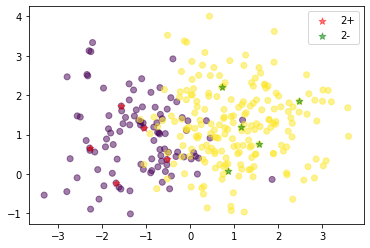

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.5)
plt.scatter(A[Sc12[0], 0], A[Sc12[0], 1], c = 'r', s = 50, marker = '*', alpha = 0.5, label = "2+")
plt.scatter(B[Sc22[0], 0], B[Sc22[0], 1], c = 'g', s = 50, marker = '*', alpha = 0.5, label = "2-")
plt.legend()

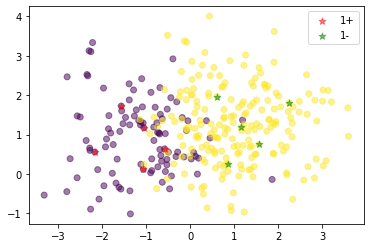

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.5)
plt.scatter(X[Sc11[0], 0], X[Sc11[0], 1], c = 'r', s = 50, marker = '*', alpha = 0.5, label = "1+")
plt.scatter(X[Sc21[0], 0], X[Sc21[0], 1], c = 'g', s = 50, marker = '*', alpha = 0.5, label = "1-")
plt.legend()

In [15]:
N1 = 200
np.random.seed(5)
A = np.random.normal(size = (N1, 2)) + np.array([-1, 1])
KA = pairwise_kernels(A, metric = "rbf", gamma = 1.0)

mmd1 = MMD(KA)
Sm1 = greedy(mmd1)[0]

mmd2 = MMD_w(KA, np.ones(N1))
Sm2 = greedy(mmd2)[0]
Sm1, Sm2

([73, 196, 10, 174, 131], [73, 192, 19, 10, 131])

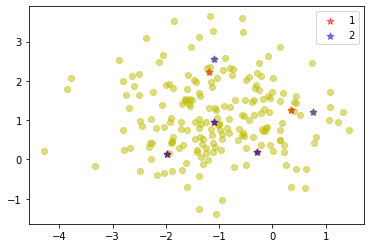

In [16]:
plt.scatter(A[:, 0], A[:, 1], c = "y", alpha = 0.5)
plt.scatter(A[Sm1, 0], A[Sm1, 1], c = 'r', s = 50, marker = '*', alpha = 0.5, label = "1")
plt.scatter(A[Sm2, 0], A[Sm2, 1], c = 'b', s = 50, marker = '*', alpha = 0.5, label = "2")
plt.legend()